In [45]:
import pandas as pd
import numpy as np
import csv



In [46]:
import pathlib
pathlib.Path().absolute()

WindowsPath('C:/Users/Regina/Final_Project/Cleaning')

In [47]:
nypd = pd.read_csv (r"C:/Users/Regina/Final_Project/Data/nypd.csv", sep=',', error_bad_lines=False, index_col=False, dtype='unicode', low_memory=False)
nypd.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,JURIS_DESC,KY_CD,...,SUSP_RACE,U,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,897166826,32,MANHATTAN,1/1/2010,4:00:00,NaN,NaN,COMPLETED,N.Y. POLICE DEPT,344,...,UNKNOWN,U,25-44,BLACK,M,1000600,237702,40.81910585,-73.94093041,"(40.81910584700006, -73.94093041099995)"
1,796842361,14,MANHATTAN,1/1/2010,11:55:00,NaN,NaN,COMPLETED,N.Y. POLICE DEPT,341,...,NaN,U,UNKNOWN,UNKNOWN,D,987220,212676,40.75043077,-73.98928218,"(40.75043076800006, -73.98928217599996)"
2,526032424,14,MANHATTAN,1/1/2010,18:30:00,2/20/2020,19:40:00,COMPLETED,N.Y. POLICE DEPT,578,...,NaN,U,25-44,BLACK,F,989633,213425,40.75248545,-73.98057262,"(40.75248544500005, -73.98057261799994)"
3,886487505,111,QUEENS,1/1/2010,20:00:00,2/22/2020,10:00:00,COMPLETED,N.Y. POLICE DEPT,116,...,NaN,U,18-24,WHITE,F,1048565,216315,40.76018548,-73.76784258,"(40.76018547900003, -73.76784258499998)"
4,457505495,28,MANHATTAN,1/1/2010,20:30:00,2/22/2020,20:40:00,COMPLETED,N.Y. POLICE DEPT,117,...,NaN,U,UNKNOWN,UNKNOWN,E,997427,230378,40.7990088,-73.95240854,"(40.799008797000056, -73.95240854099995)"


In [48]:
print(nypd.shape)

(196626, 29)


In [49]:
print(nypd.columns)

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'JURIS_DESC',
       'KY_CD', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PATROL_BORO',
       'PD_CD', 'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'U', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'Lat_Lon'],
      dtype='object')


In [50]:
print(nypd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196626 entries, 0 to 196625
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   CMPLNT_NUM         196474 non-null  object
 1   ADDR_PCT_CD        196474 non-null  object
 2   BORO_NM            196286 non-null  object
 3   CMPLNT_FR_DT       196474 non-null  object
 4   CMPLNT_FR_TM       196474 non-null  object
 5   CMPLNT_TO_DT       176827 non-null  object
 6   CMPLNT_TO_TM       176883 non-null  object
 7   CRM_ATPT_CPTD_CD   196474 non-null  object
 8   JURIS_DESC         196474 non-null  object
 9   KY_CD              196474 non-null  object
 10  LAW_CAT_CD         196474 non-null  object
 11  LOC_OF_OCCUR_DESC  165080 non-null  object
 12  OFNS_DESC          196473 non-null  object
 13  PATROL_BORO        196299 non-null  object
 14  PD_CD              196299 non-null  object
 15  PD_DESC            196299 non-null  object
 16  PREM_TYP_DESC      1

In [51]:
nypd["BORO_NM"].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
196621     True
196622     True
196623     True
196624     True
196625     True
Name: BORO_NM, Length: 196626, dtype: bool

In [52]:
nypd.loc[nypd["BORO_NM"].isnull()]

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,JURIS_DESC,KY_CD,...,SUSP_RACE,U,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
103,480677193,10,NaN,6/1/2012,16:40:00,NaN,NaN,COMPLETED,N.Y. POLICE DEPT,101,...,WHITE,U,45-64,WHITE,M,985447,211285,40.74661324,-73.9956815,"(40.746613240000045, -73.99568150499994)"
106,659949337,25,NaN,7/15/2012,1:33:00,NaN,NaN,COMPLETED,N.Y. POLICE DEPT,101,...,NaN,U,25-44,BLACK,M,1002413,232800,40.80564768,-73.93439348,"(40.80564768200003, -73.93439347599997)"
134,886672937,114,NaN,7/1/2013,14:56:00,NaN,NaN,COMPLETED,N.Y. HOUSING POLICE,101,...,NaN,U,25-44,UNKNOWN,M,1002577,221583,40.7748597,-73.93383168,"(40.77485969700007, -73.93383168399998)"
143,560345129,23,NaN,10/31/2013,19:44:00,NaN,NaN,COMPLETED,N.Y. POLICE DEPT,101,...,BLACK,U,18-24,BLACK,M,1000267,225915,40.78675438,-73.94216163,"(40.78675437600003, -73.94216162599997)"
149,789951248,47,NaN,1/1/2014,20:10:00,NaN,NaN,COMPLETED,N.Y. POLICE DEPT,101,...,BLACK,U,25-44,BLACK,M,1026595,262849,40.88804042,-73.84685417,"(40.88804042400005, -73.84685417199995)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
len(nypd)

196626

In [54]:
nypd.count()

CMPLNT_NUM           196474
ADDR_PCT_CD          196474
BORO_NM              196286
CMPLNT_FR_DT         196474
CMPLNT_FR_TM         196474
CMPLNT_TO_DT         176827
CMPLNT_TO_TM         176883
CRM_ATPT_CPTD_CD     196474
JURIS_DESC           196474
KY_CD                196474
LAW_CAT_CD           196474
LOC_OF_OCCUR_DESC    165080
OFNS_DESC            196473
PATROL_BORO          196299
PD_CD                196299
PD_DESC              196299
PREM_TYP_DESC        195893
RPT_DT               196474
SUSP_AGE_GROUP       149785
SUSP_RACE            149785
U                    196626
VIC_AGE_GROUP        196473
VIC_RACE             196473
VIC_SEX              196473
X_COORD_CD           196474
Y_COORD_CD           196474
Latitude             196474
Longitude            196474
Lat_Lon              196474
dtype: int64

In [55]:
nypd['CRM_ATPT_CPTD_CD'].value_counts()

COMPLETED    193287
ATTEMPTED      3187
Name: CRM_ATPT_CPTD_CD, dtype: int64

In [56]:
nypd['CRM_ATPT_CPTD_CD'].value_counts() * 100 /len(nypd)

COMPLETED    98.301852
ATTEMPTED     1.620844
Name: CRM_ATPT_CPTD_CD, dtype: float64

In [57]:
nypd['VIC_SEX'].value_counts()

F    78195
M    71399
D    28784
E    18095
Name: VIC_SEX, dtype: int64

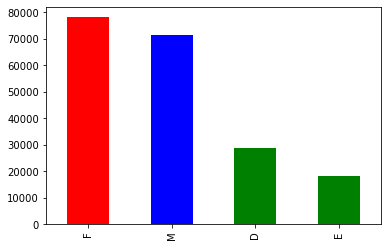

In [58]:
%matplotlib inline

alpha_color = 1

nypd['VIC_SEX'].value_counts().plot(kind='bar',
                                            color=['r', 'b', 'g', 'g'],
                                            alpha=alpha_color)

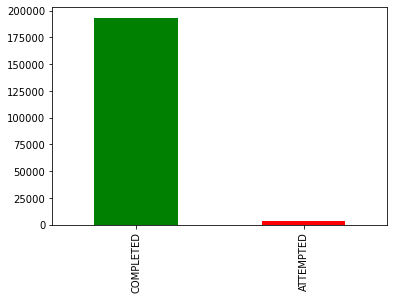

In [59]:
nypd['CRM_ATPT_CPTD_CD'].value_counts().plot(kind='bar',
                                            color=['g', 'r'],
                                            alpha=alpha_color)

In [60]:
nypd['LAW_CAT_CD'].value_counts()

MISDEMEANOR    102314
FELONY          62300
VIOLATION       31860
Name: LAW_CAT_CD, dtype: int64

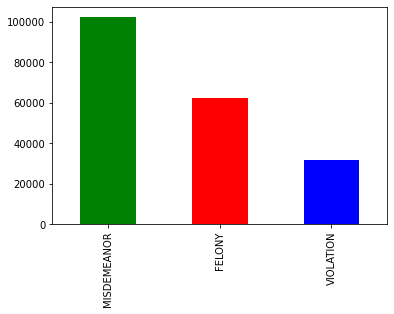

In [61]:
nypd['LAW_CAT_CD'].value_counts().plot(kind='bar',
                                            color=['g', 'r', 'b'],
                                            alpha=alpha_color)

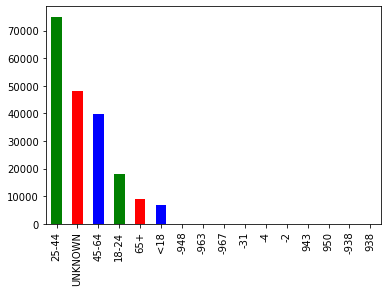

In [62]:
nypd['VIC_AGE_GROUP'].value_counts().plot(kind='bar',
                                            color=['g', 'r', 'b'],
                                            alpha=alpha_color)

##Age needs cleaning.

In [64]:
nypd['VIC_SEX'].replace(['M','F','D','E'],[0,1,3,4],inplace=True)

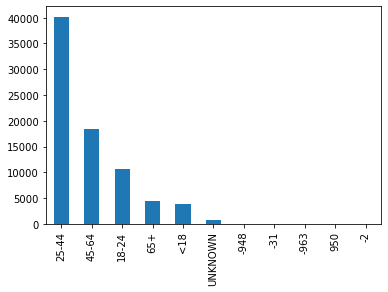

In [67]:
nypd[nypd['VIC_SEX'] == 1]['VIC_AGE_GROUP'].value_counts().plot(kind='bar')


In [68]:
nypd['CRM_ATPT_CPTD_CD'].replace(['COMPLETED','ATTEMPTED'],[0,1],inplace=True)

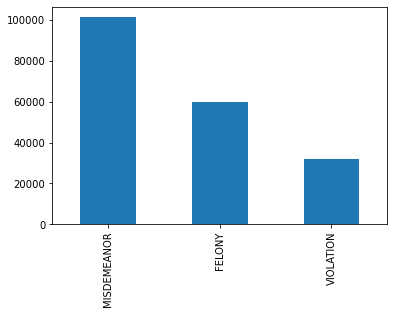

In [69]:
nypd[nypd['CRM_ATPT_CPTD_CD'] == 0]['LAW_CAT_CD'].value_counts().plot(kind='bar')

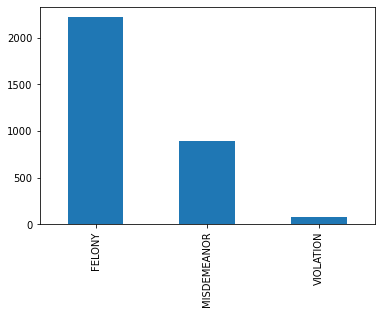

In [70]:
nypd[nypd['CRM_ATPT_CPTD_CD'] == 1]['LAW_CAT_CD'].value_counts().plot(kind='bar')

In [71]:
nypd['LAW_CAT_CD'].replace(['FELONY','MISDEMEANOR', 'VIOLATION'],[0,1,2],inplace=True)

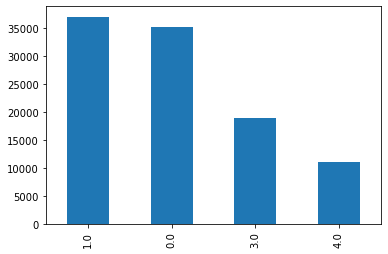

In [72]:
nypd[nypd['LAW_CAT_CD'] == 1]['VIC_SEX'].value_counts().plot(kind='bar')

##Female is 1, and male is 0 Misdemeanor is prevelent among female vics

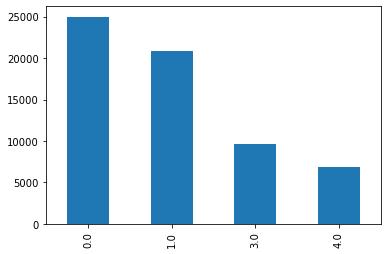

In [73]:
nypd[nypd['LAW_CAT_CD'] == 0]['VIC_SEX'].value_counts().plot(kind='bar')
##Felony affects males

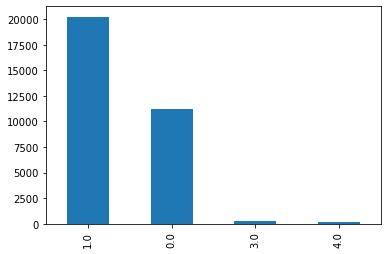

In [74]:
nypd[nypd['LAW_CAT_CD'] == 2]['VIC_SEX'].value_counts().plot(kind='bar')
##General violations affect mostly women

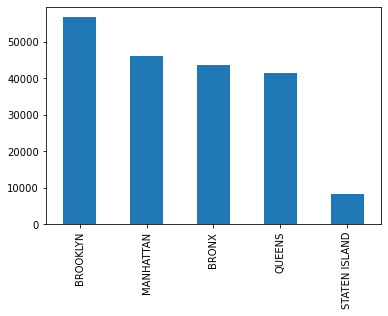

In [76]:
nypd['BORO_NM'].value_counts().plot(kind='bar')

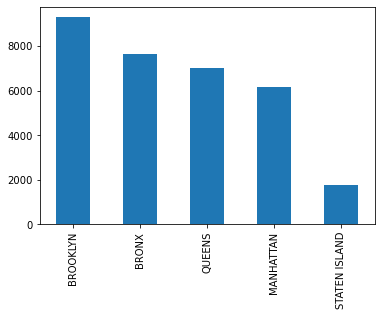

In [78]:
nypd[nypd['LAW_CAT_CD'] == 2]['BORO_NM'].value_counts().plot(kind='bar')

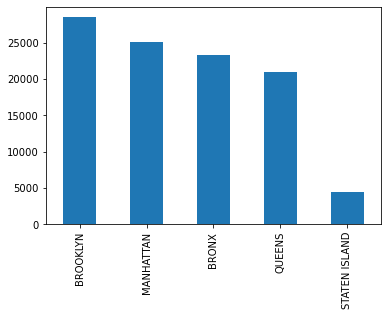

In [79]:
nypd[nypd['LAW_CAT_CD'] == 1]['BORO_NM'].value_counts().plot(kind='bar')

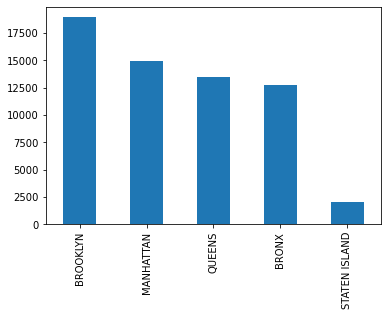

In [80]:
nypd[nypd['LAW_CAT_CD'] == 0]['BORO_NM'].value_counts().plot(kind='bar')